# FINAL PROJECT 
**Data Mining dan Visualisasi A**

oleh :
- Dini Athhirah Yasmin / 5003211033
- Tarbiyatul Latifah / 5003211098
- Elsa Maulida Pangesti / 5003211101

### Introduction
Final project ini mengggunakan *Hotel Reservation Dataset* yang bersumber pada [kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset). Dataset mengandung beberapa informasi tentang hotel bookings, termasuk beberapa features seperti booking history, customer details, dan reservation status. 

### Variabel
- **Booking_ID**: Identifier unik dari setiap pemesanan.
- **no_of_adults**: Jumlah dewasa yang menginap.
- **no_of_children**: Jumlah anak-anak yang menginap.
- **no_of_weekend_nights**: Jumlah malam akhir pekan (Sabtu atau Minggu) yang tamu menginap atau memesan untuk menginap di hotel.
- **no_of_week_nights**: Jumlah malam kerja (Senin hingga Jumat) yang tamu menginap atau memesan untuk menginap di hotel.
- **type_of_meal_plan**: Jenis rencana makan yang dipesan oleh pelanggan.
- **required_car_parking_space**: Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1 - Ya)
- **room_type_reserved**: Jenis kamar yang dipesan oleh pelanggan.
- **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
- **arrival_year**: Tahun dari tanggal kedatangan.
- **arrival_month**: Bulan dari tanggal kedatangan.
- **arrival_date**: Tanggal dalam bulan dari tanggal kedatangan.
- **market_segment_type**: Penunjukan segmen pasar.
- **repeated_guest**: Apakah pelanggan adalah tamu yang berulang? (0 - Tidak, 1 - Ya)
- **no_of_previous_cancellations**:Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- **no_of_previous_bookings_not_canceled**: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- **avg_price_per_room**: Harga rata-rata per hari dari reservasi; harga kamar dinamis (dalam euro).
- **no_of_special_requests**: Total jumlah permintaan khusus yang dibuat oleh pelanggan (mis. lantai tinggi, pemandangan dari kamar, dll).
- **booking_status**: Tanda menunjukkan apakah pemesanan dibatalkan atau tidak.

### Problem Statement

Pemesanan dan perilaku pelanggan secara dramatis. Sejumlah besar reservasi hotel dibatalkan karena pembatalan atau ketidakhadiran. Alasan umum pembatalan termasuk perubahan rencana, konflik penjadwalan, dll. Hal ini sering kali dipermudah dengan adanya pilihan untuk melakukannya secara gratis atau lebih disukai dengan biaya rendah yang bermanfaat bagi tamu hotel, namun hal ini merupakan faktor yang kurang diinginkan dan mungkin mengurangi pendapatan hotel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
#import sklearn 

### Preprocessing

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
df.shape

(36275, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#cek missingg value
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
#mengubah data ke bentuk string
df['arrival_year'] = df['arrival_year'].astype(str)
df['arrival_month'] = df['arrival_month'].astype(str)
df['arrival_date'] = df['arrival_date'].astype(str)

#membuat function validasi date
def is_valid_date(year, month, day):
    try:
        pd.to_datetime(f"{year}-{month}-{day}", format="%Y-%m-%d")
        return True
    except ValueError:
        return False

valid_dates = df.apply(lambda row: is_valid_date(row['arrival_year'], row['arrival_month'], row['arrival_date']), axis=1)
#membuat copy an df
df_valid = df[valid_dates].copy()
df_valid['arrival_date'] = pd.to_datetime(df_valid['arrival_year'] + '-' + df_valid['arrival_month'] + '-' + df_valid['arrival_date'], format='%Y-%m-%d')


In [9]:
df_valid

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,2018-08-03,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,2018-10-17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,2018-07-01,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,2018-04-21,Online,0,0,0,94.50,0,Canceled


In [10]:
#drop unnecessary columns
df_valid.drop(columns=['arrival_year', 'arrival_month','Booking_ID'], inplace=True)

In [11]:
df_valid['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [12]:
df_valid['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [13]:
df_valid['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [14]:
df_valid['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [15]:
# #one hot encoding untuk data kategori

# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# encoded_data = encoder.fit_transform(df_valid[['room_type_reserved', 'repeated_guest', 
#                                                'required_car_parking_space', 'market_segment_type', 
#                                                'type_of_meal_plan']])
# feature_names = encoder.get_feature_names_out(['room_type_reserved', 'repeated_guest', 
#                                                'required_car_parking_space', 'market_segment_type', 
#                                                'type_of_meal_plan'])
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)
# print(encoded_df)

In [16]:
df_valid['booking_status'] = df_valid['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [17]:
# num_df = df_valid[['arrival_date', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
                  #'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'booking_status']]
# df_valid = pd.concat([num_df, encoded_df], axis=1)

In [18]:
#data transformation
df_valid['type_of_meal_plan'] = df_valid['type_of_meal_plan'].map({
    'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})
df_valid['room_type_reserved'] = df_valid['room_type_reserved'].map({
    'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})
df_valid['market_segment_type'] = df_valid['market_segment_type'].map({
    'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

In [19]:
df_valid

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017-10-02,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018-11-06,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018-02-28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018-05-20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018-04-11,1,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018-08-03,1,0,0,0,167.80,1,0
36271,2,0,1,3,1,0,1,228,2018-10-17,1,0,0,0,90.95,2,1
36272,2,0,2,6,1,0,1,148,2018-07-01,1,0,0,0,98.39,2,0
36273,2,0,0,3,0,0,1,63,2018-04-21,1,0,0,0,94.50,0,1


In [20]:
df_valid.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [24]:
#cek outlier

from scipy.stats import zscore

numerical_cols = df_valid.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
z_scores = df_valid[numerical_cols].apply(zscore)
threshold = 3
outliers_zscore = z_scores[(z_scores > threshold) | (z_scores < -threshold)].dropna(how='all').index
print(f'Number of outliers detected using Z-score method: {len(outliers_zscore)}')
print(outliers_zscore)


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')
Number of outliers detected using Z-score method: 4880
Index([    5,     9,    27,    32,    35,    60,    63,    72,    80,    84,
       ...
       36165, 36177, 36178, 36207, 36210, 36221, 36227, 36249, 36260, 36269],
      dtype='int64', length=4880)


Berdasarkan cek data oulier diatas terdapat sebesar 4880 data outlier, maka kami memutuskan untuk tidak menghapus outlier tersebut, karena kami ingin mempertahankan informasi yang ada pada dataset.

In [25]:
#deskriptif statistik
df_valid.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.949859,0.030934,1.708455,85.275070,2018-05-24 16:37:29.130746880,0.804432,0.025553,0.023346,0.152961,103.437259,0.619957,0.327777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,2018-02-28 00:00:00,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,2018-06-12 00:00:00,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,2018-09-19 00:00:00,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,2018-12-31 00:00:00,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000
std,0.518572,0.402540,0.870992,1.410784,0.480313,0.173142,1.399451,85.953561,NaN,0.646656,0.157801,0.368483,1.753366,35.084264,0.786403,0.469410


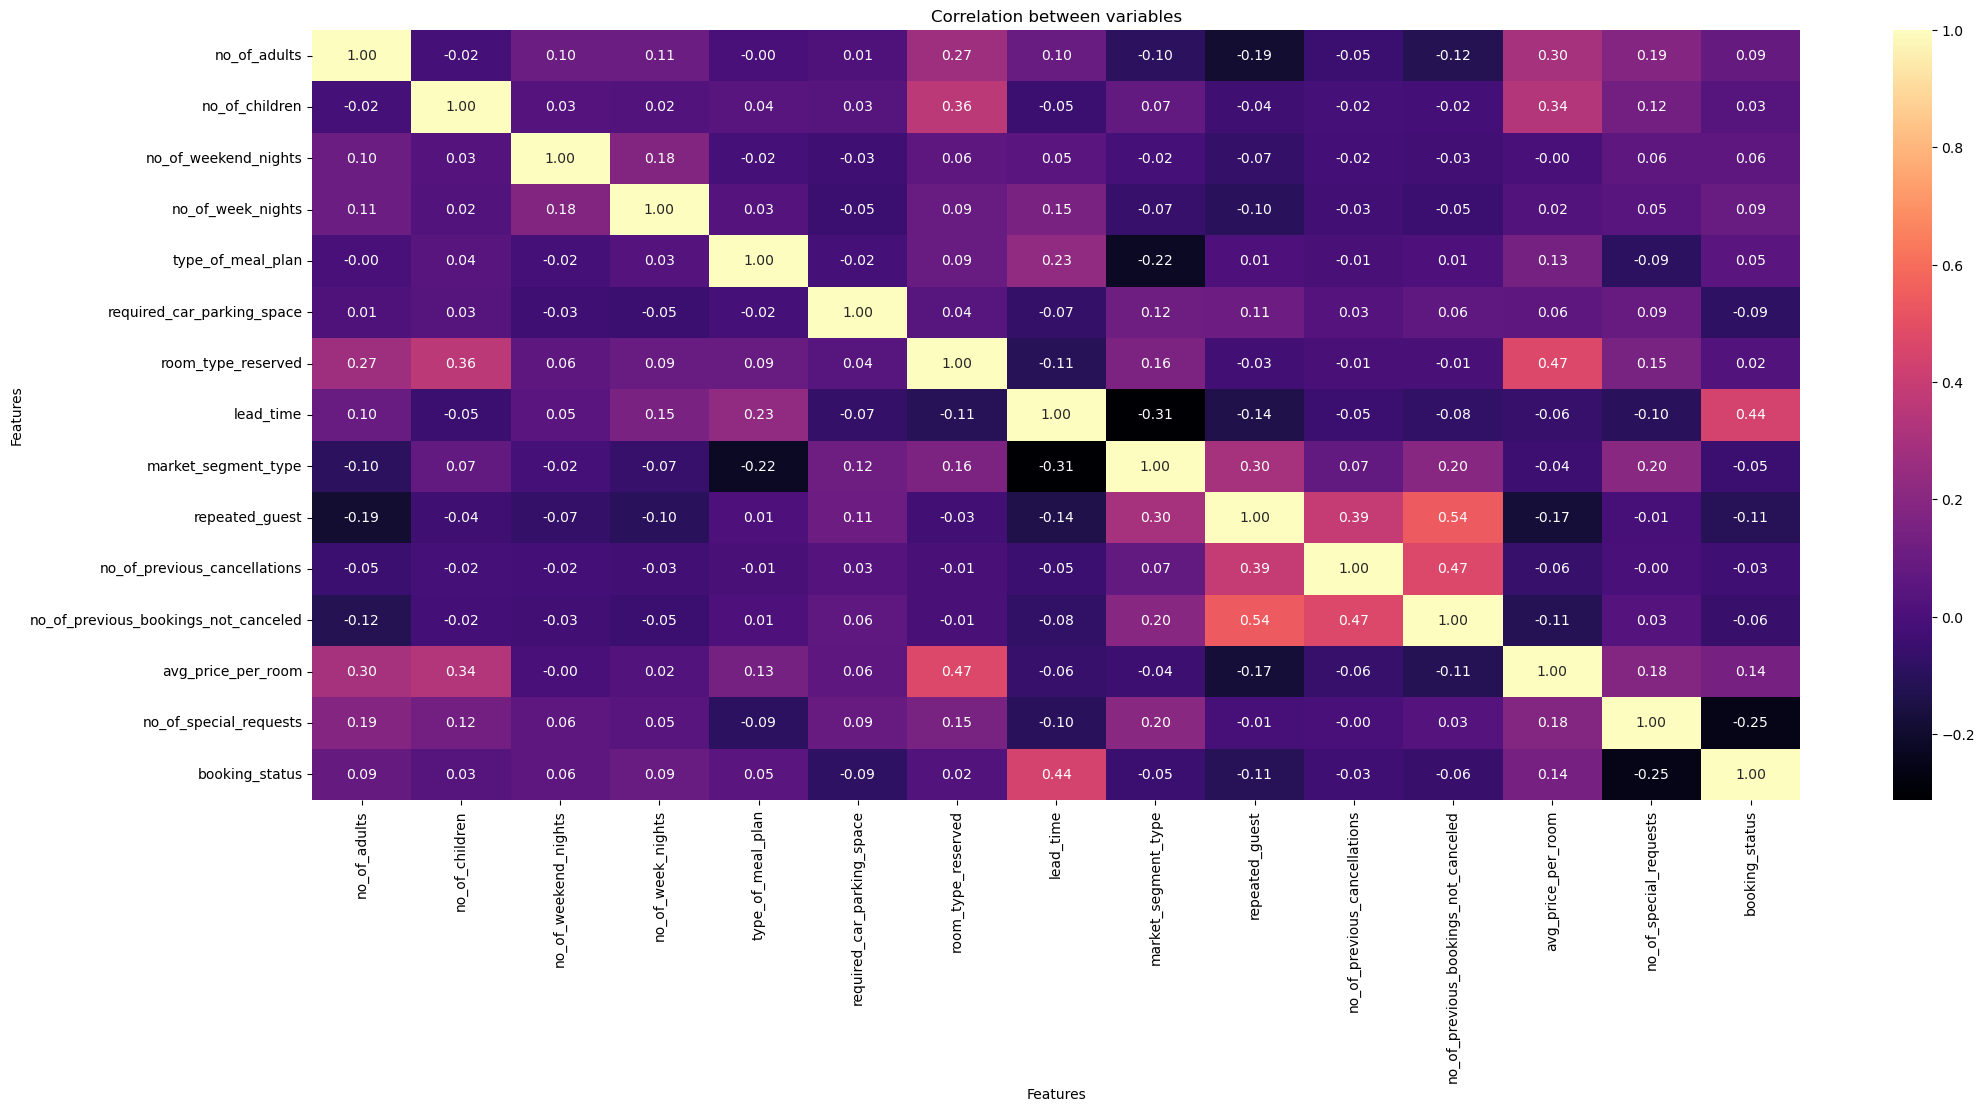

In [26]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df_valid.corr(numeric_only=True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**Interpretasi :** Berdasarkan heatmap masih banyak variabel dengan nilai korelasi yang cukup tinggi antar variabel lainnya. sehingga perlu dilakukan feature selection untuk mendapatkan feature(variabel) dengan korelasi yang rendah antar feature lainnya dan juga memiliki peran penting dalam analisis.

### Feature Selection

In [27]:
labels_dist = df_valid['booking_status'].value_counts()
labels_dist_percentage = round((labels_dist / labels_dist.sum()) * 100, 2)
print(labels_dist_percentage) 

booking_status
0    67.22
1    32.78
Name: count, dtype: float64


ada indikasi imbalance data

In [28]:
##fixing imbalance

#mengidentifikasi kelas mayoritas dan minoritas
class_counts = df_valid['booking_status'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

#memisahkan data mayoritas dan minoritas
df_majority = df_valid[df_valid['booking_status'] == majority_class]
df_minority = df_valid[df_valid['booking_status'] == minority_class]

#oversampling data minoritas
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=0)

#menggabungkan kembali data mayoritas dan minoritas yang telah di-oversample
df_resampled = pd.concat([df_majority, df_minority_oversampled])

# Memeriksa distribusi kelas setelah resampling
labels_dist_resampled = df_resampled['booking_status'].value_counts()
labels_dist_percentage_resampled = round((labels_dist_resampled / labels_dist_resampled.sum()) * 100, 2)
print(labels_dist_percentage_resampled)


booking_status
0    50.0
1    50.0
Name: count, dtype: float64


In [29]:
df_resampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017-10-02,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018-11-06,1,0,0,0,106.68,1,0
6,2,0,1,3,1,0,1,34,2017-10-15,1,0,0,0,107.55,1,0
7,2,0,1,3,1,0,4,83,2018-12-26,1,0,0,0,105.61,1,0
8,3,0,0,4,1,0,1,121,2018-07-06,0,0,0,0,96.90,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25699,2,0,1,1,2,0,1,301,2018-07-30,0,0,0,0,115.00,1,1
3756,2,0,1,1,1,0,1,89,2017-07-27,1,0,0,0,76.50,0,1
1261,1,0,0,1,1,0,4,7,2018-09-22,1,0,0,0,150.15,1,1
10010,3,0,1,2,1,0,1,165,2018-08-12,1,0,0,0,146.70,0,1


In [30]:
y = df_resampled['booking_status']
X = df_resampled.drop(columns=['booking_status','arrival_date'], axis=1) 
feature_names = X.columns.tolist()
target_names = y.unique().tolist()

- **Metode Wrapper RFE dengan decission tree classifier**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#using RFE with decission tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan seluruh fitur:", accuracy_all_features)

#feature selection using RFE
n_features_to_select = 5
rfe_selector = RFE(estimator=clf, n_features_to_select=n_features_to_select, 
                   step=1)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)

#train the classifier with selected features
clf_selected = clf
clf_selected.fit(X_train_selected, y_train)

#test the classifier with selected features
y_pred_selected = clf_selected.predict(X_test_selected)
accuracy_selected_features = accuracy_score(y_test, y_pred_selected)
print("Akurasi dengan fitur terpilih:", accuracy_selected_features)

#get the indices of the selected features
selected_feature_indices = rfe_selector.get_support(indices=True)
selected_feature_names = [feature_names[idx] for idx in selected_feature_indices]
print("Fitur terpilih:", selected_feature_names)


Akurasi dengan menggunakan seluruh fitur: 0.917179802955665
Akurasi dengan fitur terpilih: 0.9160509031198686
Fitur terpilih: ['no_of_week_nights', 'lead_time', 'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']


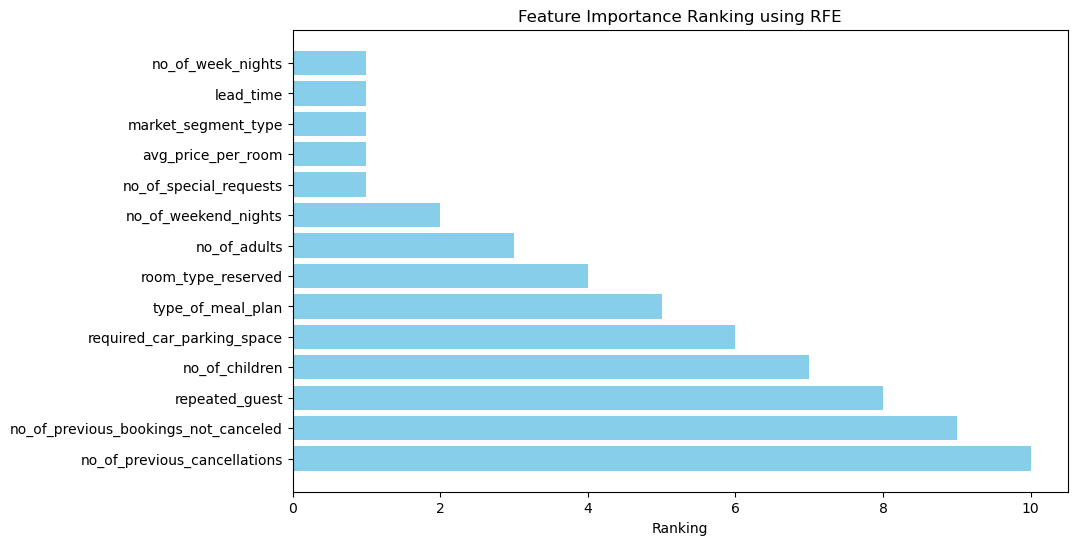

In [33]:
#get the ranking of the features
ranking = rfe_selector.ranking_
feature_ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': ranking})

#sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

#plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking_df['Feature'], feature_ranking_df['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.title('Feature Importance Ranking using RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [34]:
X_train_original = X_train
X_test_original = X_test

In [35]:
selected_features = ['no_of_week_nights', 'lead_time', 'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']

In [36]:
X_train = X_train_original[selected_features]
X_test = X_test_original[selected_features]

In [38]:
X_test

,no_of_week_nights,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests
30481,2,23,1,159.00,0
20722,0,15,1,99.00,0
30385,3,204,0,100.00,0
33158,2,47,1,59.91,1
31615,2,161,0,130.00,0
...,...,...,...,...,...
94,5,171,1,111.59,0
31385,3,28,1,74.80,1
9674,3,40,1,83.90,1
22310,4,275,0,90.00,0


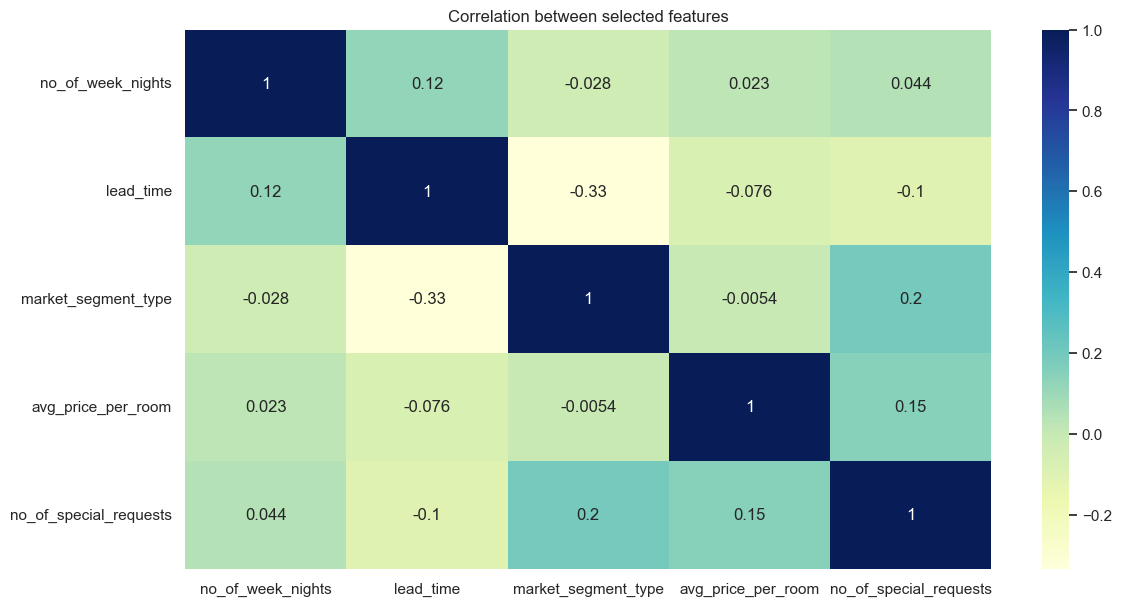

In [39]:
#heatmap untuk memastikan korelasi fitur terpilih sebelum dilakukan modelling

sns.set(rc={'figure.figsize':(13, 7)})
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation between selected features")
plt.show()

**Interpretasi :** Berdasarkan heatmap diatas, setiap fitur memiliki korelasi yang rendah dengan antar fitur yang lain, sehingga fitur terpilih telah siap untuk dilakukan analisis selanjutnya.

### Classification

- **Logistic Regression**

In [72]:
from sklearn.linear_model import LogisticRegression

logical = LogisticRegression(max_iter=1000, random_state=42)
logical.fit(X_train,y_train)
logical_predict = logical.predict(X_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

logical_predict = logical.predict(X_test)
acc_lr = accuracy_score(y_test, logical_predict)
f1_lr = f1_score(y_test, logical_predict, pos_label=0)
prec_lr = precision_score(y_test, logical_predict, pos_label=0)
rec_lr = recall_score(y_test,logical_predict, pos_label=0)
results_lr = pd.DataFrame([['Logistic regression', acc_lr, f1_lr, prec_lr, rec_lr]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_lr

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic regression,0.765189,0.766149,0.752006,0.780833


**Interpretasi :** Berdasarkan model logistic regression diperoleh nilai accuracy sebesar 76,51% dan precission (not canceled) sebesar 75,2% , pada f1 sebesar 76.61% , dan sensitifitas memprediksi benar sebesar 78.08%. secara umum lebih dari 50%, sudah masuk kategori yang baik. 


- **Training and testing menggunakan repeated HoldOut and K-Fold CV (k=10)**

In [74]:
#repeated holdout (k=10)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RepeatedKFold

# Initialize RepeatedKFold with 10 splits and 10 repetitions
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform RepeatedKFold cross-validation
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit the Logistic Regression model
    logical = LogisticRegression(max_iter=1000, random_state=42)
    logical.fit(X_train, y_train)
    
    # Make predictions on the test set
    logical_predict = logical.predict(X_test)
    logical_predict_proba = logical.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, logical_predict))
    f1_scores.append(f1_score(y_test, logical_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, logical_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, logical_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, logical_predict_proba))

    # Calculate specificity
    tn = ((logical_predict == 0) & (y_test == 0)).sum()
    fp = ((logical_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, logical_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [75]:
# Compute average scores across all folds and repetitions
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_lr = pd.DataFrame([['Logistic Regression with repeated Holdout (k=10)', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                          columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_lr)

                                             Model  Accuracy Score  F1 score  \
0  Logistic Regression with repeated Holdout (k=5)        0.767323  0.769576   

   Precision    Recall       AUC  Specificity  
0   0.762143  0.777216  0.849997     0.777216  


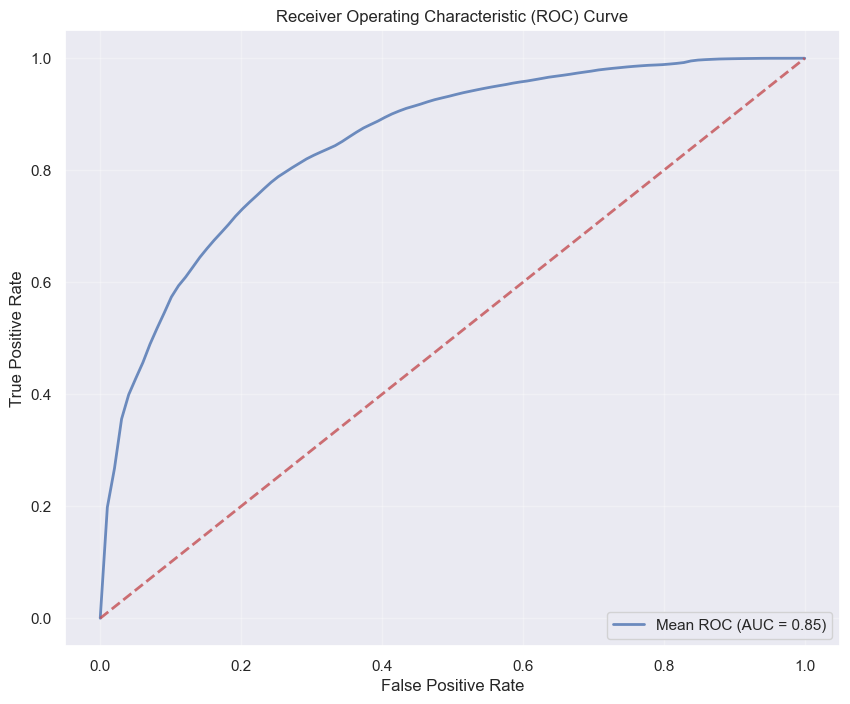

In [76]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
#for i in range(len(tprs)):
  #  plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [77]:
#KFold CV (k=10)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
fprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit the Logistic Regression model
    logical = LogisticRegression(max_iter=1000, random_state=42)
    logical.fit(X_train, y_train)
    
    # Make predictions on the test set
    logical_predict = logical.predict(X_test)
    logical_predict_proba = logical.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, logical_predict))
    f1_scores.append(f1_score(y_test, logical_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, logical_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, logical_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, logical_predict_proba))
    
    # Calculate specificity
    tn = ((logical_predict == 0) & (y_test == 0)).sum()
    fp = ((logical_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, tresholds = roc_curve(y_test, logical_predict_proba)
    fprs.append(fpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [78]:
# Average the performance metrics across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_lr = pd.DataFrame([['Logistic regression with KFold CV (k=10)', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                          columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'ROC&AUC', 'Specificity'])

print(results_lr)

                                      Model  Accuracy Score  F1 score  \
0  Logistic regression with KFold CV (k=10)        0.767488  0.769792   

   Precision    Recall   ROC&AUC  Specificity  
0    0.76227  0.777549  0.850069     0.777549  


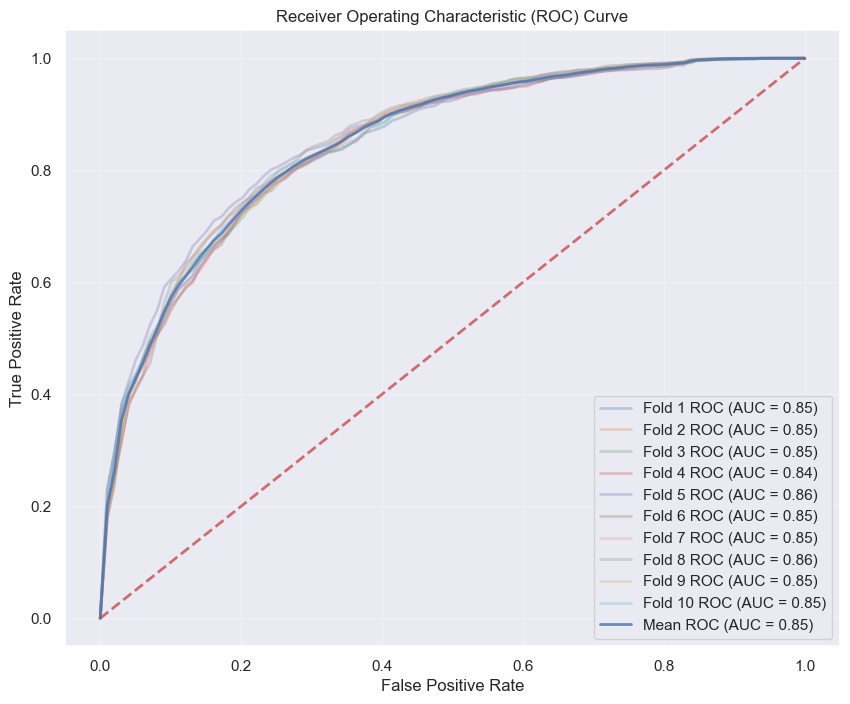

In [79]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

- **KNN**

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
knn_predict = knn.predict(X_test)

acc_knn = accuracy_score(y_test,knn_predict)
f1_knn = f1_score(y_test,knn_predict, pos_label=0)
prec_knn = precision_score(y_test,knn_predict, pos_label=0)
rec_knn = recall_score(y_test,knn_predict, pos_label=0)
results_knn = pd.DataFrame([['KNN', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.820813,0.818239,0.845161,0.792978


**Interpretasi :** Berdasarkan model K-nearest neighbors diperoleh nilai accuracy sebesar 78,67%, precission sebesar 81,56%, dan sensitifitas sebesar 88.2%  Nilai-nilai tersebut jelas lebih baik dibandingkan dengan menggunakan metode klasifikasi sebelumnya yaitu logistic regression (tanpa model evaluation). 

- **Training and testing menggunakan repeated HoldOut and K-Fold CV (k=10)**

In [81]:
# repeated holdout (k=10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold

#inisialisasi dengan n_repeats=10 dan n_split=10
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform Repeated KFold cross-validation
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier()
    
    # Fit the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    knn_predict = knn.predict(X_test)
    knn_predict_proba = knn.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, knn_predict))
    f1_scores.append(f1_score(y_test, knn_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, knn_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, knn_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, knn_predict_proba))
    
    # Calculate specificity
    tn = ((knn_predict == 0) & (y_test == 0)).sum()
    fp = ((knn_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, knn_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [82]:
# Compute average scores across all folds and repetitions
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_knn = pd.DataFrame([['KNN Repeated Holdout (k=10) ', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'ROC AUC', 'Specificity'])

print(results_knn)

                          Model  Accuracy Score  F1 score  Precision  \
0  KNN Repeated Holdout (k=10)         0.828079  0.822696   0.849222   

     Recall   ROC AUC  Specificity  
0  0.797826  0.910592     0.797826  


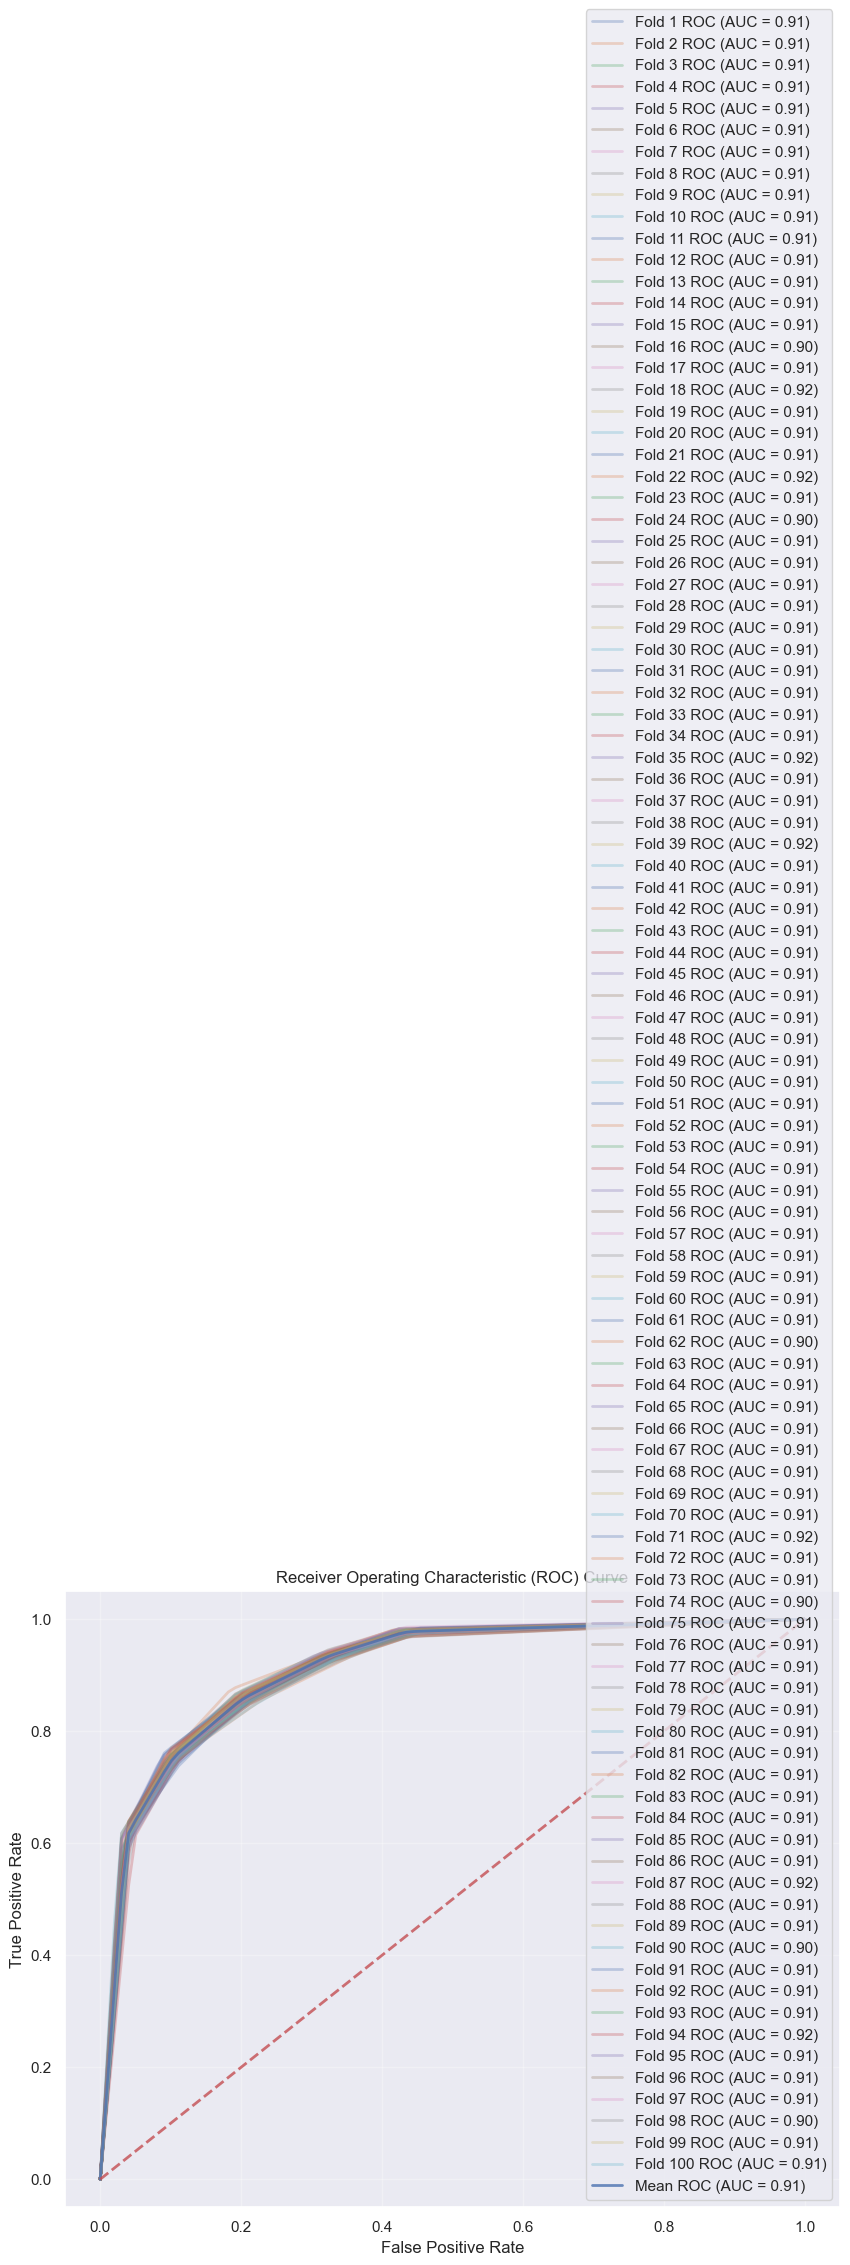

In [83]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [84]:
# menggunakan KFold CV (k=10)

from sklearn.model_selection import KFold

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier()
    
    # Fit the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    knn_predict = knn.predict(X_test)
    knn_predict_proba = knn.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, knn_predict))
    f1_scores.append(f1_score(y_test, knn_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, knn_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, knn_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, knn_predict_proba))
    
    # Calculate specificity
    tn = ((knn_predict == 0) & (y_test == 0)).sum()
    fp = ((knn_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, knn_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [85]:
# Compute average scores across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_knn = pd.DataFrame([['KNN with KFold CV (k=10) ', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_knn)

                       Model  Accuracy Score  F1 score  Precision    Recall  \
0  KNN with KFold CV (k=10)         0.828633  0.823103   0.850473  0.797444   

        AUC  Specificity  
0  0.910571     0.797444  


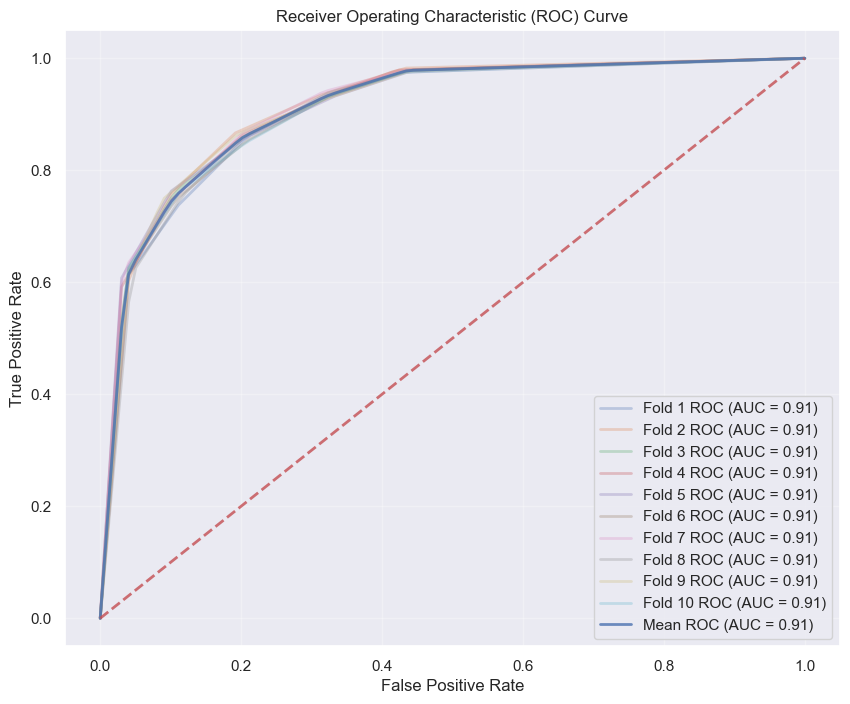

In [86]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

- **RandomForest**

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42).fit(X_train, y_train)
forest_predict = forest.predict(X_test)
acc_rf = accuracy_score(y_test,forest_predict)
f1_rf = f1_score(y_test,forest_predict, pos_label=0)
prec_rf = precision_score(y_test,forest_predict, pos_label=0)
rec_rf = recall_score(y_test,forest_predict, pos_label=0)
results_rf = pd.DataFrame([['Random forest', acc_rf, f1_rf, prec_rf, rec_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.932266,0.932029,0.95063,0.914141


**Interpretasi:** Dengan menggunakan metode random rorest diperoleh nilai accuracy sebesar 93.22%, presisis sebesar 95.06%, sensitifitas sebesar 91.41% dan F1 score sebesar 93.32%. Dibandingkan dengan menggunakan metode logistic regression dan KNN, metode ini jelas memberikan nilai accuracy yang paling baik. 

In [56]:
# repeated holdout (k=10)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform Repeated KFold cross-validation
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize RF classifier
    forest = RandomForestClassifier(random_state=42)
    
    # Fit the RF model
    forest.fit(X_train, y_train)
    
    # Make predictions on the test set
    forest_predict = forest.predict(X_test)
    forest_predict_proba = forest.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, forest_predict))
    f1_scores.append(f1_score(y_test, forest_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, forest_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, forest_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, forest_predict_proba))
    
    # Calculate specificity
    tn = ((forest_predict == 0) & (y_test == 0)).sum()
    fp = ((forest_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, forest_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [57]:
# Compute average scores across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_forest = pd.DataFrame([['Random Forest with Repeated Holdout', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_forest)

                                 Model  Accuracy Score  F1 score  Precision  \
0  Random Forest with Repeated Holdout          0.9404  0.939143    0.95936   

     Recall       AUC  Specificity  
0  0.919792  0.985153     0.919792  


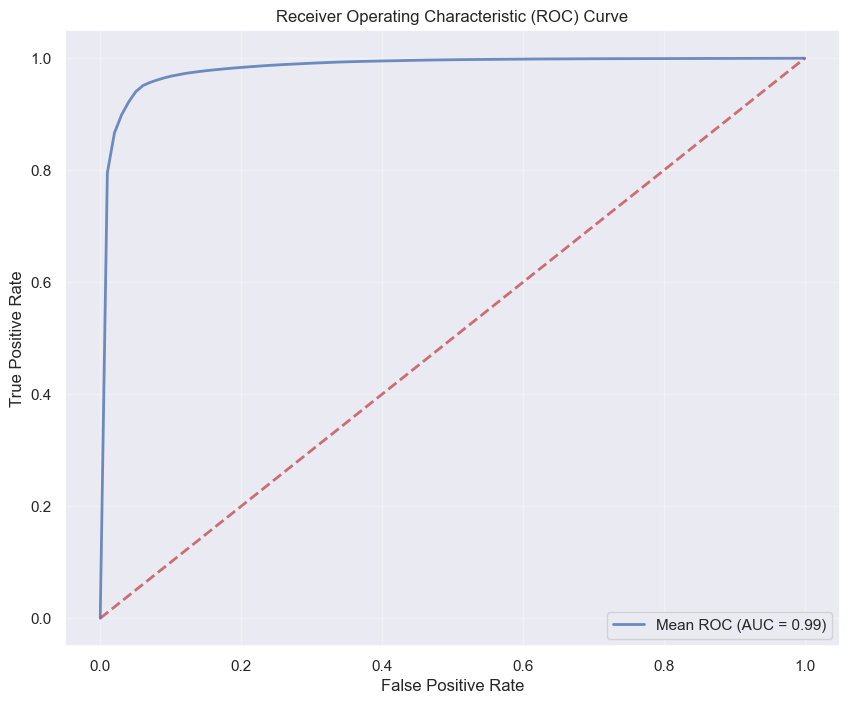

In [58]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
#for i in range(len(tprs)):
    #plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [59]:
# menggunakan KFold CV (k=10)

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize RF classifier
    forest = RandomForestClassifier(random_state=42)
    
    # Fit the RF model
    forest.fit(X_train, y_train)
    
    # Make predictions on the test set
    forest_predict = forest.predict(X_test)
    forest_predict_proba = forest.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, forest_predict))
    f1_scores.append(f1_score(y_test, forest_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, forest_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, forest_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, forest_predict_proba))
    
    # Calculate specificity
    tn = ((forest_predict == 0) & (y_test == 0)).sum()
    fp = ((forest_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, forest_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [60]:
# Compute average scores across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_forest = pd.DataFrame([['Random Forest with KFold CV', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_forest)

                         Model  Accuracy Score  F1 score  Precision    Recall  \
0  Random Forest with KFold CV        0.940784  0.939506    0.96021  0.919708   

        AUC  Specificity  
0  0.984785     0.919708  


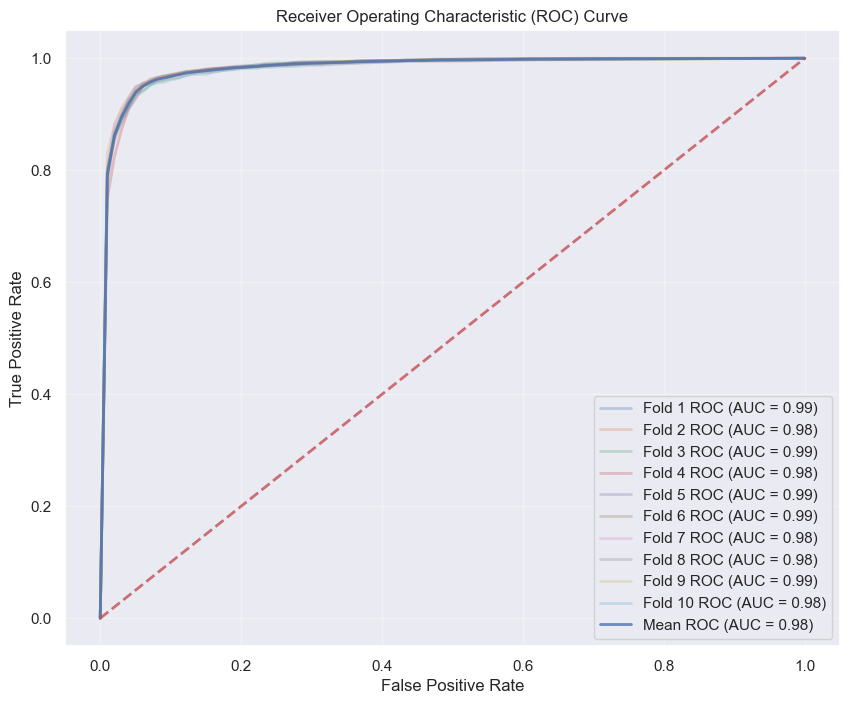

In [61]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

- **XGBoost**

In [62]:
#!pip install xgboost

In [63]:
from xgboost import XGBClassifier

defaultXGBClf = XGBClassifier()
defaultXGBClf.fit(X_train, y_train)
xgb_predict = defaultXGBClf.predict(X_test)
acc_xgb = accuracy_score(y_test, xgb_predict)
f1_xgb = f1_score(y_test, xgb_predict, pos_label=0)
prec_xgb = precision_score(y_test, xgb_predict, pos_label=0)
rec_xgb = recall_score(y_test, xgb_predict, pos_label=0)
results_xgb = pd.DataFrame([['XGBoost', acc_xgb, f1_xgb, prec_xgb, rec_xgb]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_xgb

,Model,Accuracy Score,F1 score,Precision,Recall
0,XGBoost,0.874179,0.877326,0.870187,0.884584


In [64]:
# repeated holdout (k=10)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform Repeated KFold cross-validation
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize XGB classifier
    defaultXGBClf = XGBClassifier()
    
    # Fit the XGB model
    defaultXGBClf.fit(X_train, y_train)
    
    # Make predictions on the test set
    defaultXGBClf_predict = defaultXGBClf.predict(X_test)
    defaultXGBClf_predict_proba = defaultXGBClf.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, forest_predict))
    f1_scores.append(f1_score(y_test, forest_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, forest_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, forest_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, forest_predict_proba))
    
    # Calculate specificity
    tn = ((forest_predict == 0) & (y_test == 0)).sum()
    fp = ((forest_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, forest_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [65]:
# Compute average scores across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_XGB = pd.DataFrame([['XGBoost with Repeated Holdout', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_XGB)

                           Model  Accuracy Score  F1 score  Precision  \
0  XGBoost with Repeated Holdout         0.93163  0.931051   0.938652   

     Recall       AUC  Specificity  
0  0.923624  0.973793     0.923624  


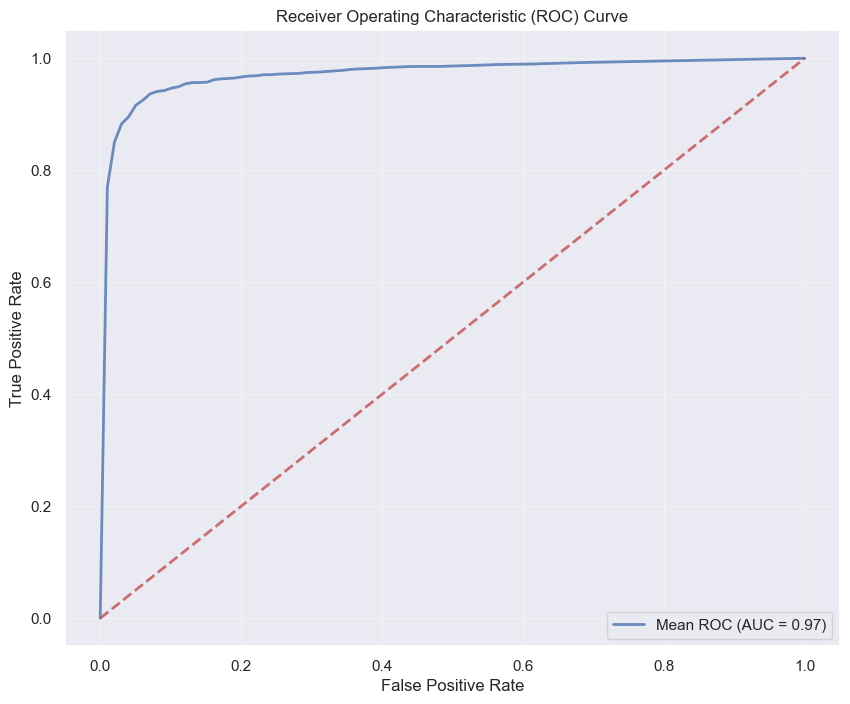

In [66]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
#for i in range(len(tprs)):
    #plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [67]:
# KFold CV (k=10)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform Repeated KFold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize XGB classifier
    defaultXGBClf = XGBClassifier()
    
    # Fit the XGB model
    defaultXGBClf.fit(X_train, y_train)
    
    # Make predictions on the test set
    defaultXGBClf_predict = defaultXGBClf.predict(X_test)
    defaultXGBClf_predict_proba = defaultXGBClf.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, forest_predict))
    f1_scores.append(f1_score(y_test, forest_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, forest_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, forest_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, forest_predict_proba))
    
    # Calculate specificity
    tn = ((forest_predict == 0) & (y_test == 0)).sum()
    fp = ((forest_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, forest_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [68]:
# Compute average scores across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_XGB = pd.DataFrame([['XGBoost with Repeated Holdout', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_XGB)

                           Model  Accuracy Score  F1 score  Precision  \
0  XGBoost with Repeated Holdout        0.931691  0.931113   0.938715   

     Recall       AUC  Specificity  
0  0.923684  0.973841     0.923684  


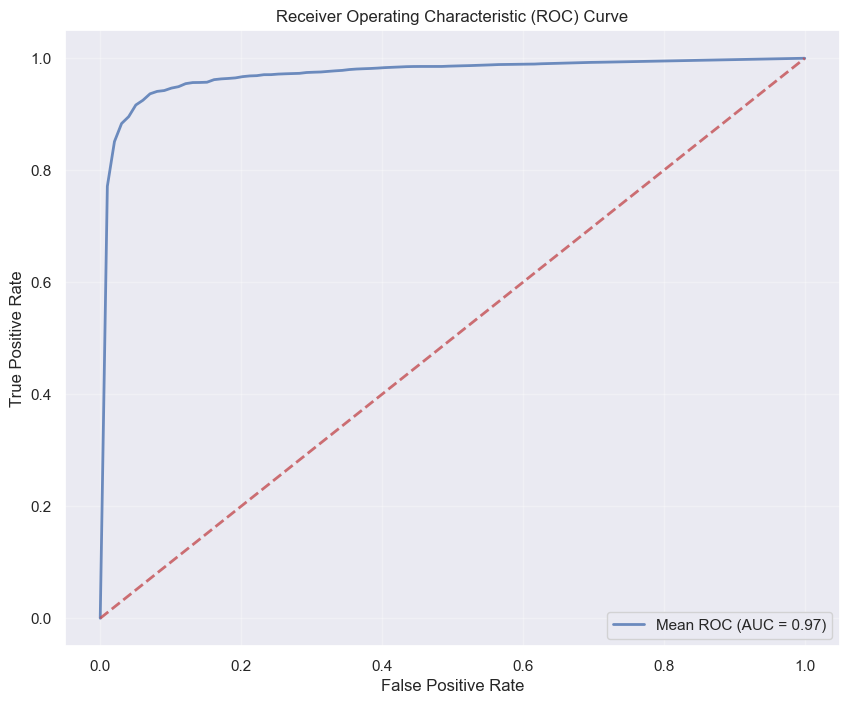

In [69]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
#for i in range(len(tprs)):
    #plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Kesimpulan

Analisis klasifikasi yang paling baik dari 4 metode klasifikasi yang kami gunakan dengan 5 fitur terpilih adalah metode klasifikasi Random Forest. hal ini dikarenakan dengan metode ini diperoleh nilai accuracy yang paling tinggi dibandingkan ketiga metode lainnya yaitu logistic regggression, KNN, dan XBoost. Nilai accuracy training dan testing dengan KFold Cross validation diperolehh sebesar 94.07%. JIka dilihat dari nilai ROC AUC juga memperlihatkan kategori yang sangat baik dalam prediksi karena berada pada angka 98.47%. Nilai sensitifitas dan spesifisitas sebesar 91.97% juga sudah sangat baik.